Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

Draw the inferences from the clusters obtained.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
air=pd.read_excel('/users/rahulkp/downloads/EastWestAirlines.xlsx',sheet_name='data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
air=air.drop('ID#', axis=1)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
air['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [10]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


before doing clustering lets standardize or scale the data 

In [13]:
# Normalization function , we are using min max scaler here
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)
    

In [15]:
# normalized data frame,considering the numerical part of the data
df_norm=norm_func(air.iloc[:,:])

In [16]:
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


For better optimization of values lets use Standard scaler

In [19]:
air.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [20]:
array=air.values

In [22]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler().fit(array)
X=stdscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Hierarchical Clustering

Text(0.5, 1.0, 'dendrogram')

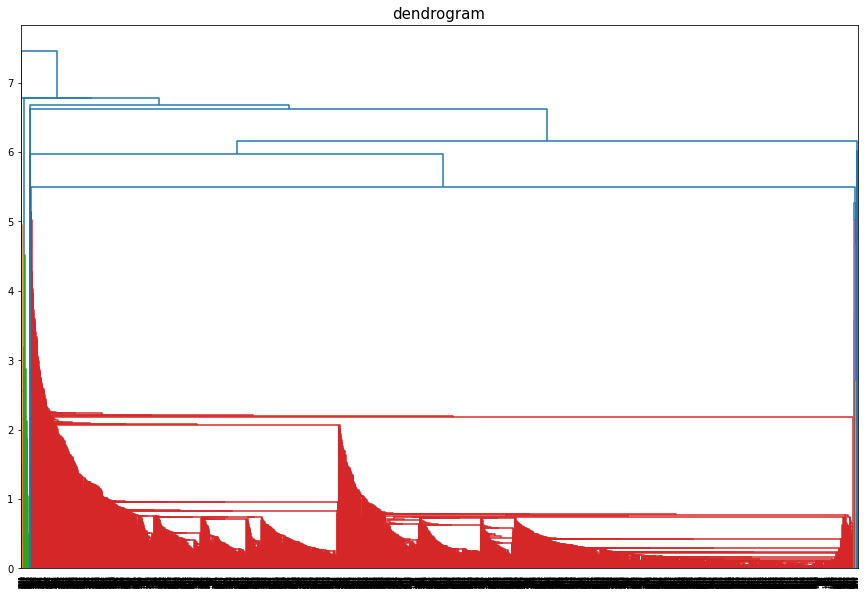

In [92]:
# create dendogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('dendrogram',size=15)

Text(0.5, 1.0, 'dendrogram')

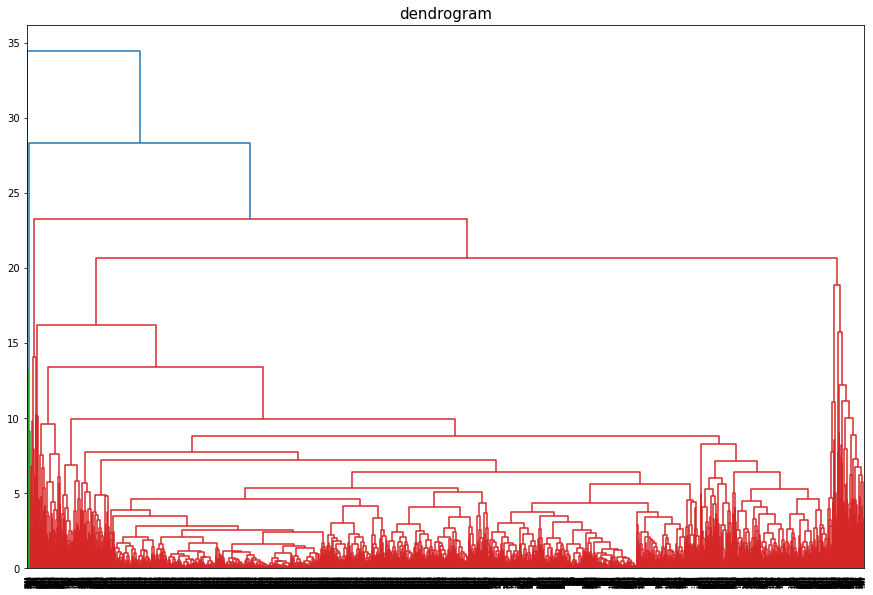

In [26]:
fig=plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title('dendrogram',size=15)

Text(0.5, 1.0, 'dendrogram')

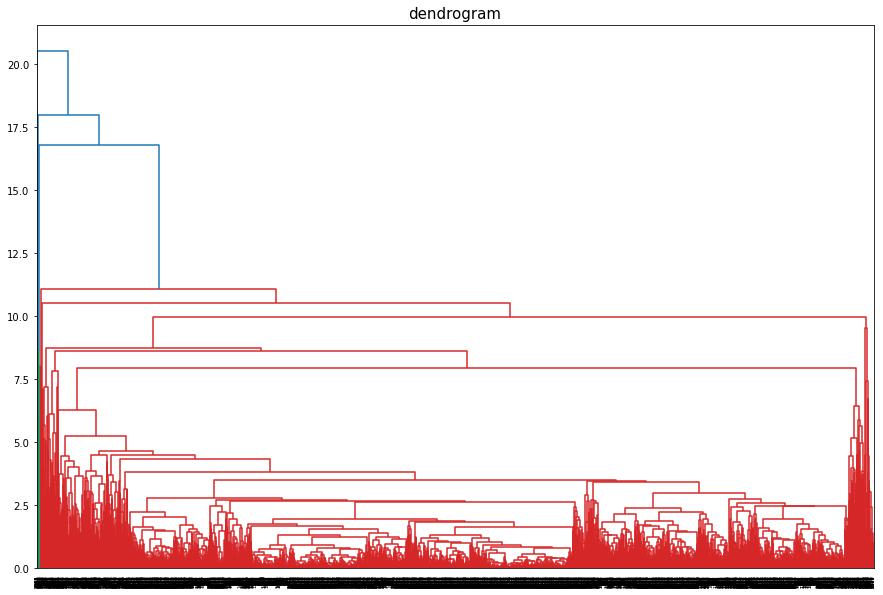

In [27]:
fig=plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='average'))
plt.title('dendrogram',size=15)

Text(0.5, 1.0, 'dendrogram')

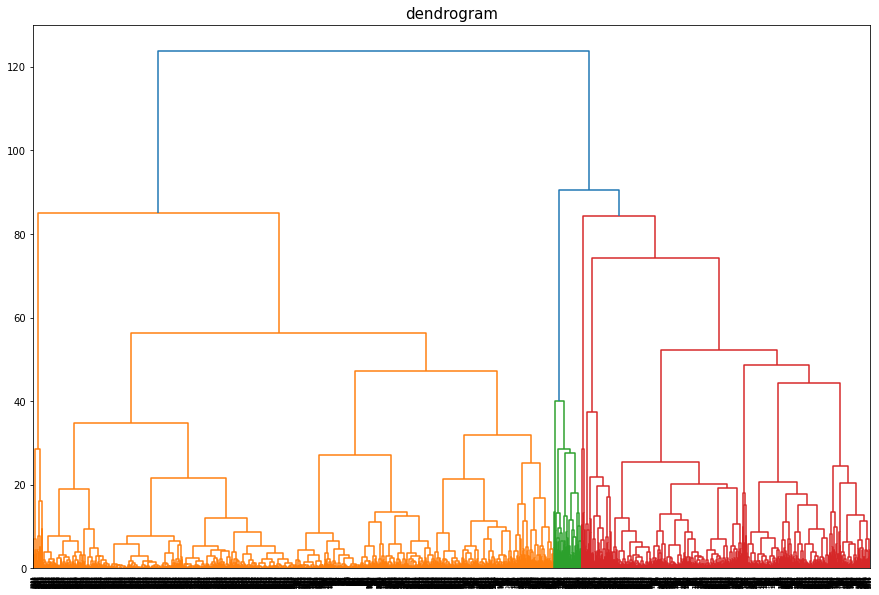

In [28]:
fig=plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram',size=15)

out of above 4 linkages , linkage with 'ward' can be considered for further analysis

This hierarchical clustering is called Agglomerative clustering because from bottom we are going UP

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete').fit(X)

In [31]:
h_cl=hc.fit_predict(X)
h_cl

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
from sklearn import metrics
S1=metrics.silhouette_score(X,h_cl)
S1

0.5625737661941762

from hierarchical clustering we got a silhouette score of 0.56

# K- Means clustering

K-Means is going to find the distance from the cluster center to each of the cluster point

To find optimum number of  cluster,The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

In [35]:
from sklearn.cluster import KMeans

[43989.0, 35409.5114524244, 30899.246824652197, 27446.37245668137, 24541.32958204577, 21089.97362892965, 19165.861458655658, 17316.866446128286, 16043.406242309502, 14726.983322766795]


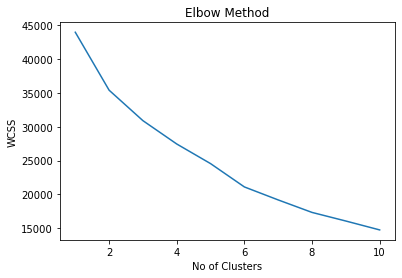

In [41]:
#WCSS (Within Cluster Sum of Squares)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
cl_new=KMeans(n_clusters=4)
y_Kmeans=cl_new.fit_predict(X)

In [45]:
y_Kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [47]:
cl_new.cluster_centers_

array([[ 0.42763734,  0.02387693,  1.17219297, -0.0826225 , -0.05489184,
         0.89065038,  0.74281047, -0.07639187, -0.08431692,  0.36817515,
         0.56535661],
       [-0.29777984, -0.06415748, -0.61542606,  0.03268783, -0.06074586,
        -0.51842681, -0.49221572, -0.17681236, -0.19127997, -0.2078489 ,
        -0.34866731],
       [ 1.27648591,  0.8975798 ,  0.13345106,  0.17636387, -0.06276658,
         0.7282463 ,  1.72737304,  3.69666069,  4.01145674,  0.29934458,
         0.96810668],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [48]:
S2=metrics.silhouette_score(X,y_Kmeans)
S2

0.30817910395530373

# DB scan clustering

In [85]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1.4,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1.4, min_samples=8)

In [86]:
#Noisy samples are given the label -1.
dbscan.labels_[0:50]

array([ 0,  0,  0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  0,  0,  0,  1,  1,
        1,  1,  1,  1, -1, -1,  0, -1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  1,  1,  0,  1,  1,  0,  1, -1, -1,  0, -1,  0,  1,  1,  0])

In [87]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [88]:
df=pd.concat([air,cl],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [89]:
df['cluster'].value_counts()

 0    2391
 1    1196
-1     389
 2      15
 3       8
Name: cluster, dtype: int64

In [90]:
S3=metrics.silhouette_score(X,dbscan.labels_)
S3

0.2477683770704435

In [91]:
ss=pd.DataFrame({'Clustering Type':['Hierarchical','K-Means','DB Scan'],'Silhouette_score':[S1,S2,S3]})
ss

,Clustering Type,Silhouette_score
0,Hierarchical,0.562574
1,K-Means,0.308179
2,DB Scan,0.247768


For The given Airlines dataset,

we have found that the among the 3 clustering method , Hierarchical Clustering is the best suited one for this data set, As its having a high Silhouette Score when compared with other two